In [31]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly as pty

In [30]:
#!pip install matplotlib seaborn plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 21.9 MB/s eta 0:00:0000:0100:01
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 19.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.6 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 14.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 14.7 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [3]:
df = pd.read_csv('datasets/dataset.csv')

In [4]:
df.head(n=10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0
5,15730447,Anderson,629,France,Female,49,4,0.00,2,1,1,196335.48,0
6,15597309,Howell,749,Spain,Male,36,7,0.00,2,0,0,80134.65,0
7,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
8,15773949,Cherkasova,692,France,Female,36,3,0.00,2,1,1,8282.22,0
9,15610226,Fenton,614,France,Female,27,9,106414.57,2,0,0,77500.81,0


# do some exploratory analysis

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.569061e+07,650.117222,38.921000,5.001000,76893.091364,1.526444,0.703889,0.513000,100420.052994,0.203444
std,7.199601e+04,96.646003,10.489566,2.887893,62474.639590,0.581573,0.456566,0.499859,57505.668759,0.402583
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562803e+07,583.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000
50%,1.569045e+07,652.000000,37.000000,5.000000,97816.465000,1.000000,1.000000,1.000000,100523.305000,0.000000
75%,1.575309e+07,717.000000,44.000000,7.000000,127785.447500,2.000000,1.000000,1.000000,149589.342500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [26]:
df.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
8995    0
8996    0
8997    0
8998    0
8999    1
Name: Exited, Length: 9000, dtype: int64

In [28]:
corr_mat = df.corr()

In [34]:
corr_mat.nlargest(5, 'Exited')

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Exited,-0.006518,-0.024658,0.283791,-0.014703,0.114812,-0.048373,-0.001705,-0.158099,0.008938,1.000000
Age,0.011799,0.001510,1.000000,-0.002760,0.022740,-0.032364,-0.013122,0.085997,-0.007878,0.283791
Balance,-0.013185,0.002691,0.022740,-0.020403,1.000000,-0.303977,-0.019647,-0.010258,0.010424,0.114812
EstimatedSalary,0.016346,-0.001163,-0.007878,0.004066,0.010424,0.018736,-0.008091,-0.011430,1.000000,0.008938
HasCrCard,-0.014304,-0.005829,-0.013122,0.027363,-0.019647,0.007104,1.000000,-0.013076,-0.008091,-0.001705


<AxesSubplot:>

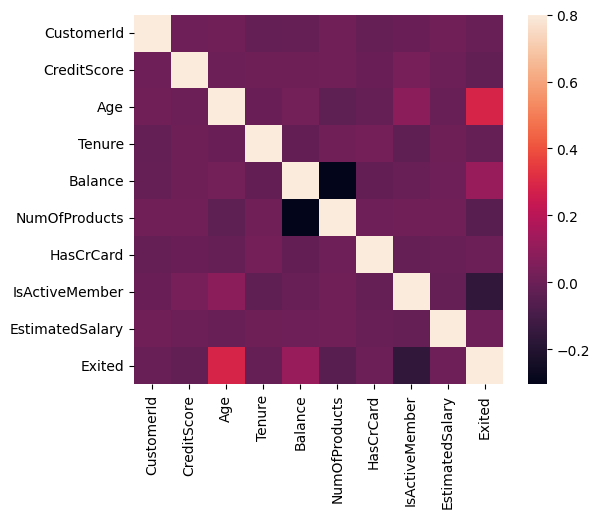

In [33]:
sns.heatmap(corr_mat, vmax=0.8, square=True)

In [6]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df2 = pd.read_csv('datasets/A1.txt',sep='\s+', header=None)

In [18]:
df2.head(n=10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,AQC00914000,1981,4279,3745,10762,6067,4096,3606,6203,5292,3092,6866,7163,7866
1,AQC00914000,1982,5039,9643,3211,2016,3355,2827,3199,9356,4150,6418,3965,1595
2,AQC00914000,1983,3351,2971,3044,2642,1644,1717,1020,1788,3433,6801,2531,7242
3,AQC00914000,1984,3368,3538,8187,2715,2916,3288,1246,3391,2932,6578,4787,9787
4,AQC00914000,1985,5202,3078,3279,8414,2884,4787,3447,3193,5296,5410,3950,1651
5,AQC00914000,1986,8573,4212,2799F,7095F,5012F,3135F,3878F,2989F,6368F,4740F,4312F,8310F
6,AQC00914000,1987,5146,7648,3954F,3573F,3118F,2788F,2043F,3498F,841,2669,2298,6208F
7,AQC00914000,1988,3336F,4798,4908,4400F,4297F,2817,3878,2548F,3792,4645,5969F,8915F
8,AQC00914000,1989,5523F,5806F,3273F,5388F,3672F,3079F,4166F,209,788,4982,6379,3731
9,AQC00914000,1990,4932,6857,3288,4518,1635,3598,2214,1541,2611,5439,4525,3530


In [9]:
df2.columns

Index(['AQC00914000 1981  4279   3745  10762   6067   4096   3606   6203   5292   3092   6866   7163   7866 '], dtype='object')

In [10]:
len(df2.columns)

1

In [20]:
df2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')